In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

rohanrao_air_quality_data_in_india_path = kagglehub.dataset_download('rohanrao/air-quality-data-in-india')
harsh99429_fin_dataset_path = kagglehub.dataset_download('harsh99429/fin-dataset')

print('Data source import complete.')


In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/fin-dataset/imputed_city_hour_scaled.txt'
data = pd.read_csv(file_path, delimiter=',')

# Drop missing values for simplicity (you can use imputation if needed)
data.dropna(inplace=True)
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']
data = data[features]

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print("done")

done


In [ ]:
print(data.shape)

(286196, 12)


CORESET USING K MEANS CLUSTERING

50
535
1000
2000
5000


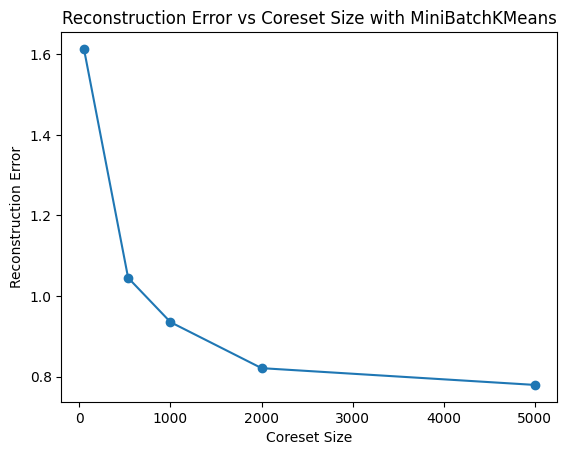

3237

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances  # Import this
import numpy as np
import matplotlib.pyplot as plt
import gc

# Clear unused memory
gc.collect()

coreset_sizes = [50,535,1000,2000,5000]
batch_size = 1000  # Number of samples per batch
errors = []

for size in coreset_sizes:
    print(size)
    kmeans = MiniBatchKMeans(n_clusters=size, random_state=42, batch_size=batch_size, n_init=10)
    kmeans.fit(scaled_data)
    distances = np.min(pairwise_distances(scaled_data, kmeans.cluster_centers_), axis=1)
    error = np.mean(distances)
    errors.append(error)

plt.plot(coreset_sizes, errors, marker='o')
plt.title("Reconstruction Error vs Coreset Size with MiniBatchKMeans")
plt.xlabel("Coreset Size")
plt.ylabel("Reconstruction Error")
plt.show()

gc.collect()

CORESET USING GREEDY SUBSET SELECTION

In [ ]:
print(errors)

[5.492305211644664, 2.441215353984578, 1.8470757971210108, 1.4477635694185744, 1.0131820611466504, 0.7753544128011451]


CORESET USING K MEANS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/fin-dataset/imputed_city_hour_scaled.txt'
data = pd.read_csv(file_path, delimiter=',')

# Convert DateTime column to datetime object
data['DateTime'] = pd.to_datetime(data['Datetime'])

# Step 1: Filter for Delhi-specific data and sort by DateTime
data = data[data['City'] == 'Delhi']
data.sort_values(by='DateTime', inplace=True)

# Drop unnecessary columns
data.drop(['City'], axis=1, inplace=True)

# Step 2: Create lag features (3 days)
data['lag_1'] = data['AQI'].shift(1)
data['lag_2'] = data['AQI'].shift(2)
data['lag_3'] = data['AQI'].shift(3)

data.dropna(inplace=True)

# Define the features for scaling (exclude AQI)
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'lag_1', 'lag_2', 'lag_3']
scaler = StandardScaler()

# Scale the features excluding AQI
scaled_data = scaler.fit_transform(data[features])

# Create a DataFrame from the scaled data and add back AQI column
scaled_df = pd.DataFrame(scaled_data, columns=features)
scaled_df['AQI'] = data['AQI'].values  # Add AQI column back

# Now you have the scaled features along with AQI in the dataset
print("done")


done


In [ ]:
print(scaled_data.shape)

(38706, 14)


Processing 50 clusters...
Processing 100 clusters...
Processing 200 clusters...
Processing 500 clusters...
Processing 1000 clusters...
Processing 2000 clusters...
Processing 5000 clusters...


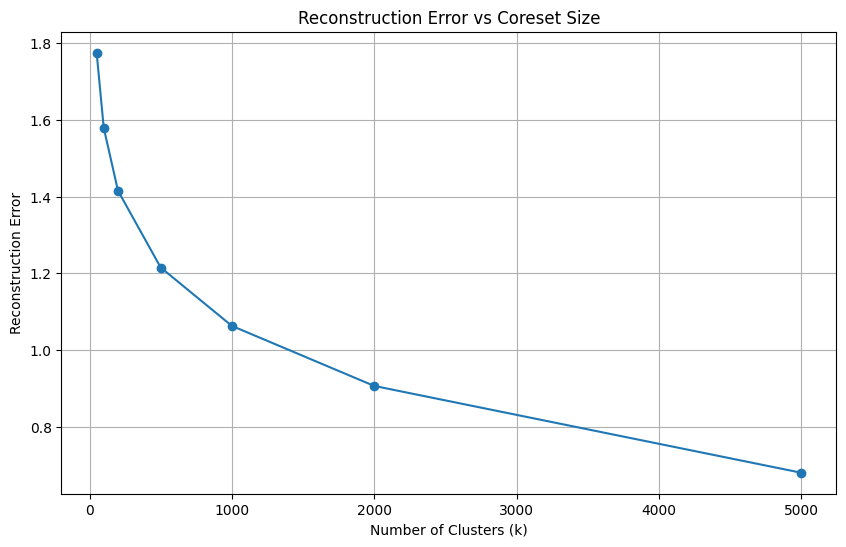

Done!


In [ ]:
# Step 4: Apply MiniBatchKMeans and calculate reconstruction error
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances  # Import this
import numpy as np
import matplotlib.pyplot as plt
import gc
coreset_sizes = [50, 100, 200, 500, 1000, 2000,5000]
batch_size = 1000
errors = []

for size in coreset_sizes:
    print(f"Processing {size} clusters...")
    kmeans = MiniBatchKMeans(n_clusters=size, random_state=42, batch_size=batch_size, n_init=10)
    kmeans.fit(scaled_data)
    distances = np.min(pairwise_distances(scaled_data, kmeans.cluster_centers_), axis=1)
    error = np.mean(distances)
    errors.append(error)

# Plot reconstruction error
plt.figure(figsize=(10, 6))
plt.plot(coreset_sizes, errors, marker='o')
plt.title("Reconstruction Error vs Coreset Size")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Reconstruction Error")
plt.grid()
plt.show()

print("Done!")


In [ ]:
print(errors)

[1.7746391815706288, 1.5790727775007145, 1.415282353868137, 1.21526575209082, 1.0631924063906095, 0.9068399902902072, 0.6807799640312545]


In [ ]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Define X and y
X = scaled_df[features].values  # Features
y = scaled_df['AQI'].values  # Target variable (AQI)

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a coreset of 2000 points using MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=2000, random_state=42)
kmeans.fit(X_train)  # Fit the KMeans model to the training data

# Now `kmeans.cluster_centers_` is available
coreset_centers = kmeans.cluster_centers_  # Shape: (2000, num_features)

# Assign each original point in X_train to its nearest cluster center
cluster_assignments = kmeans.predict(X_train)  # Array of cluster indices for each sample

# Compute the target values for each cluster center by averaging the labels
coreset_targets = []
for cluster_id in range(coreset_centers.shape[0]):  # Loop through each cluster
    # Find indices of samples in this cluster
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]

    if len(cluster_indices) > 0:  # Avoid empty clusters
        # Average the target values (y_train) for samples in this cluster
        cluster_target = y_train[cluster_indices].mean()
    else:
        cluster_target = 0  # Default to 0 or a suitable fallback value

    coreset_targets.append(cluster_target)


coreset_targets = np.array(coreset_targets)


print("Coreset Targets Shape:", coreset_targets.shape)
print("Coreset Centers Shape:", coreset_centers.shape)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Coreset Targets Shape: (2000,)
Coreset Centers Shape: (2000, 14)


Epoch 50/600, Loss: 6953.9141
Epoch 100/600, Loss: 1551.9235
Epoch 150/600, Loss: 742.1916
Epoch 200/600, Loss: 437.0445
Epoch 250/600, Loss: 275.1635
Epoch 300/600, Loss: 188.1759
Epoch 350/600, Loss: 137.3013
Epoch 400/600, Loss: 108.0846
Epoch 450/600, Loss: 90.4497
Epoch 500/600, Loss: 79.2714
Epoch 550/600, Loss: 71.7753
Epoch 600/600, Loss: 66.5769


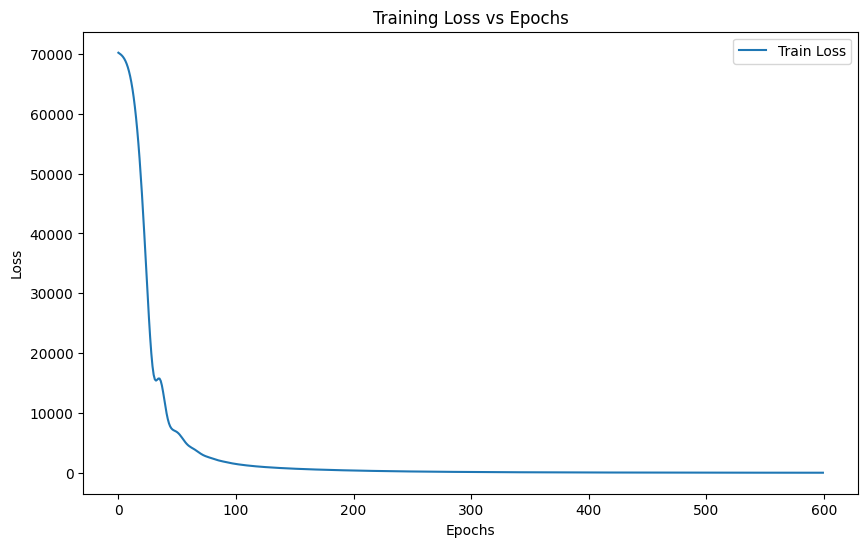

In [ ]:
# Define the neural network
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Prepare coreset data for training
coreset_centers_tensor = torch.tensor(coreset_centers, dtype=torch.float32)
coreset_targets_tensor = torch.tensor(coreset_targets, dtype=torch.float32).view(-1, 1)

# Prepare test set
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


input_size = coreset_centers.shape[1]
model = ANN(input_size)
criterion = nn.MSELoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=1e-2)

epochs = 600
train_losses = []

for epoch in range(epochs):
    model.train()

    # Zero the gradients
    optimizer.zero_grad()

    outputs = model(coreset_centers_tensor)

    loss = criterion(outputs, coreset_targets_tensor)

    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")


plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.legend()
plt.show()





In [ ]:
model.eval()

with torch.no_grad():
    y_test_pred = model(X_test_tensor).numpy()
    y_test_actual = y_test_tensor.numpy()

mse = mean_squared_error(y_test_actual, y_test_pred)
mae = mean_absolute_error(y_test_actual, y_test_pred)
r2 = r2_score(y_test_actual, y_test_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 136.8305
Mean Absolute Error (MAE): 5.8286
R² Score: 0.9874


CORESTES USING IPORTANCE SAMPLING

387
1935
3870
7741


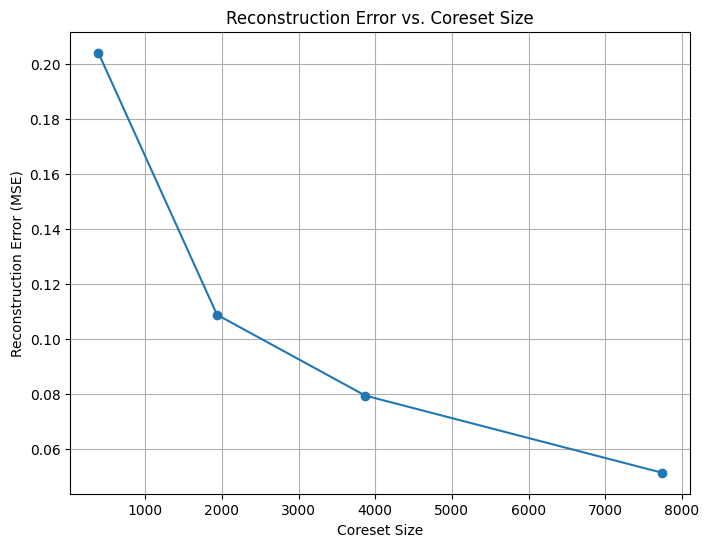

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to calculate reconstruction error
def calculate_reconstruction_error(original_data, coreset_data):
    return mean_squared_error(original_data, coreset_data)

# Define coreset sizes to evaluate
total_size = scaled_data.shape[0]
coreset_sizes = [int(0.01 * total_size), int(0.05 * total_size), int(0.1 * total_size), int(0.2 * total_size)]

# Store errors for each coreset size
reconstruction_errors = []

mean_point = np.mean(scaled_data, axis=0)
distances = np.linalg.norm(scaled_data - mean_point, axis=1)
probabilities = distances / np.sum(distances)

for size in coreset_sizes:
    print(size)
    # Sample a coreset using importance sampling
    coreset_indices = np.random.choice(len(scaled_data), size=size, replace=False, p=probabilities)
    coreset = scaled_data[coreset_indices]

    # Reconstruct original data based on the coreset (simple nearest-center approach)
    reconstructed_data = np.zeros_like(scaled_data)
    for i in range(len(scaled_data)):
        reconstructed_data[i] = coreset[np.argmin(np.linalg.norm(coreset - scaled_data[i], axis=1))]

    error = calculate_reconstruction_error(scaled_data, reconstructed_data)
    reconstruction_errors.append(error)

# Plot reconstruction error vs. coreset size
plt.figure(figsize=(8, 6))
plt.plot(coreset_sizes, reconstruction_errors, marker='o')
plt.title("Reconstruction Error vs. Coreset Size")
plt.xlabel("Coreset Size")
plt.ylabel("Reconstruction Error (MSE)")
plt.grid(True)
plt.show()


Epoch 50/500, Loss: 11130.8838
Epoch 100/500, Loss: 10811.6104
Epoch 150/500, Loss: 10689.0801
Epoch 200/500, Loss: 10541.4502
Epoch 250/500, Loss: 10412.7754
Epoch 300/500, Loss: 10251.4863
Epoch 350/500, Loss: 10087.5273
Epoch 400/500, Loss: 10038.5781
Epoch 450/500, Loss: 10010.2969
Epoch 500/500, Loss: 9906.3916


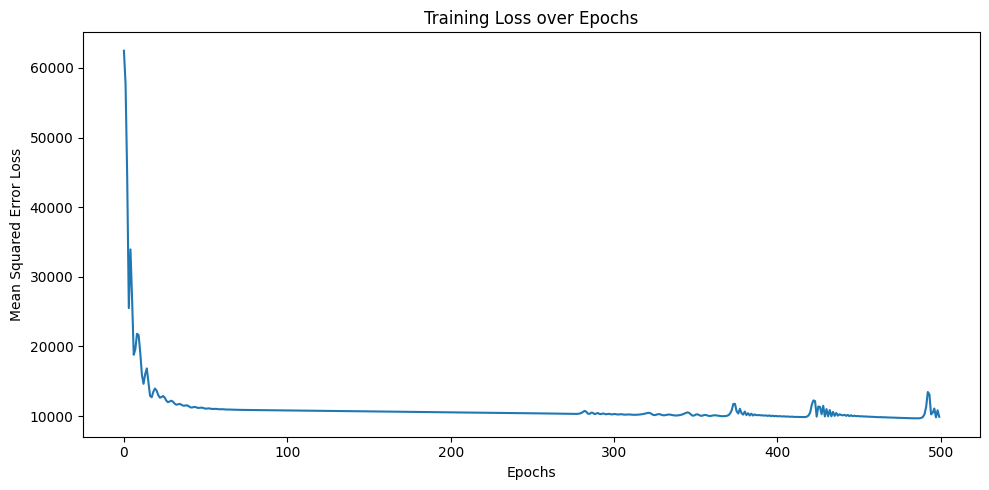

Test Metrics:
MSE: 7889.102748494434
MAE: 74.50568520958126
R2 Score: 0.2762689317790735


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Coreset Selection Function
def select_coreset_with_importance_sampling(scaled_data, size):
    mean_point = np.mean(scaled_data, axis=0)
    distances = np.linalg.norm(scaled_data - mean_point, axis=1)
    probabilities = distances / np.sum(distances)

    coreset_indices = np.random.choice(len(scaled_data),
                                       size=size,
                                       replace=False,
                                       p=probabilities)
    return scaled_data[coreset_indices]

# Neural Network Model
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_ann(X_train, y_train, coreset_size=3870, epochs=500, lr=0.1):
    # Select coreset
    X_coreset = select_coreset_with_importance_sampling(X_train, coreset_size)
    y_coreset = y_train[np.random.choice(len(y_train), size=coreset_size, replace=False)]

    # Convert to PyTorch tensors
    X_coreset_tensor = torch.FloatTensor(X_coreset)
    y_coreset_tensor = torch.FloatTensor(y_coreset).view(-1, 1)

    input_size = X_coreset.shape[1]
    model = ANN(input_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop with loss tracking
    train_losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_coreset_tensor)
        loss = criterion(outputs, y_coreset_tensor)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")
        train_losses.append(loss.item())

    return model, train_losses

def evaluate_model(model, X_test, y_test):
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test)

    with torch.no_grad():
        predictions = model(X_test_tensor).numpy().flatten()

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return mse, mae, r2

def plot_training_loss(train_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses)
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error Loss')
    plt.tight_layout()
    plt.show()


X = scaled_df[features].values
y = scaled_df['AQI'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model, train_losses = train_ann(X_train, y_train)

plot_training_loss(train_losses)

mse, mae, r2 = evaluate_model(model, X_test, y_test)

print(f"Test Metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

